In [34]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
df = pd.read_csv("C:\\Users\\Ju\\Downloads\\titanic\\train.csv")
def impute_data(df):
  # Create imputers for different strategies
  imputer_num = SimpleImputer(strategy="mean") # Impute numerical features with mean
  imputer_cat = SimpleImputer(strategy="most_frequent") # Impute categorical features with mode

  # Separate numerical and categorical columns
  num_cols = df.select_dtypes(include=[np.number])
  cat_cols = df.select_dtypes(include=["object"])

  # Impute numerical and categorical features separately
  df[num_cols.columns] = imputer_num.fit_transform(num_cols)
  df[cat_cols.columns] = imputer_cat.fit_transform(cat_cols)

  return df
data = impute_data(df.copy())

C:\Users\Ju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


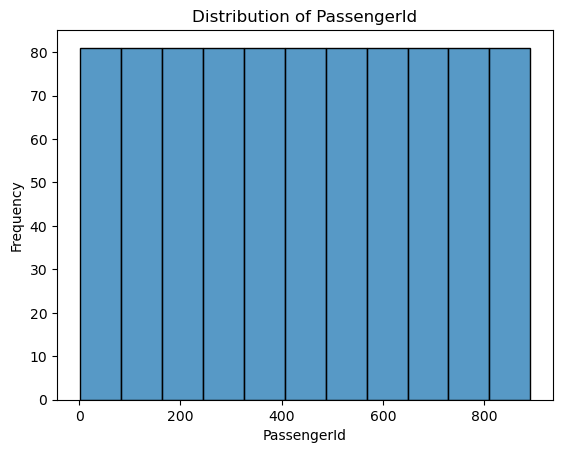

C:\Users\Ju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


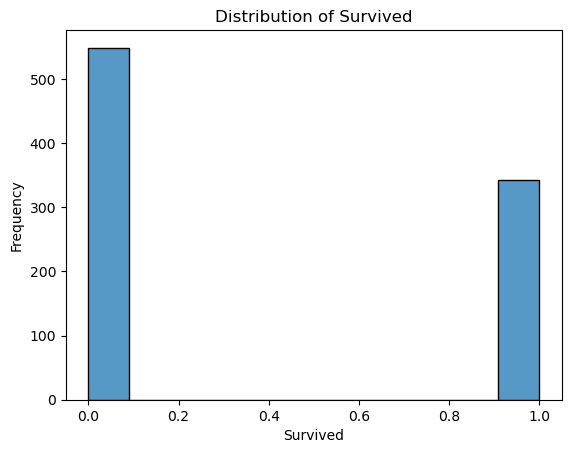

C:\Users\Ju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


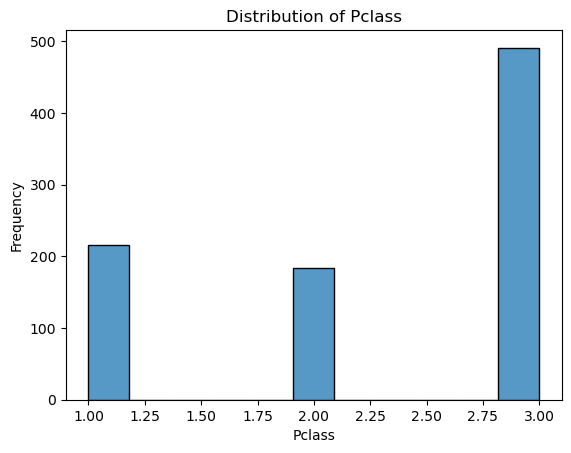

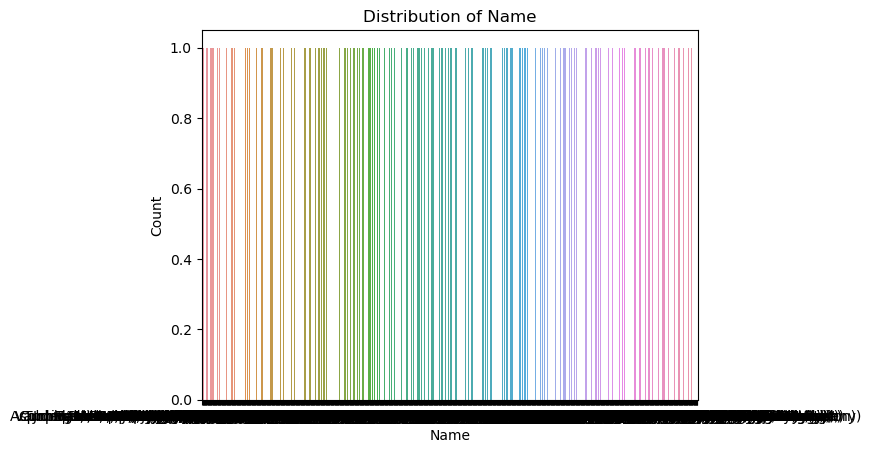

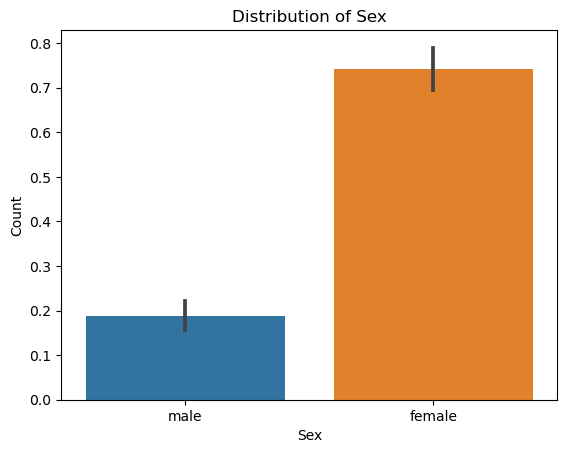

C:\Users\Ju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


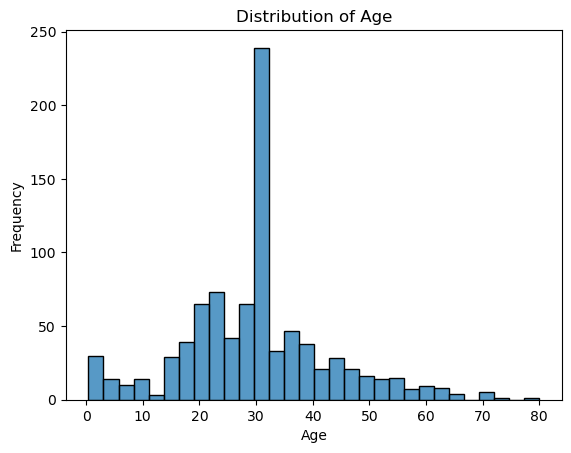

C:\Users\Ju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


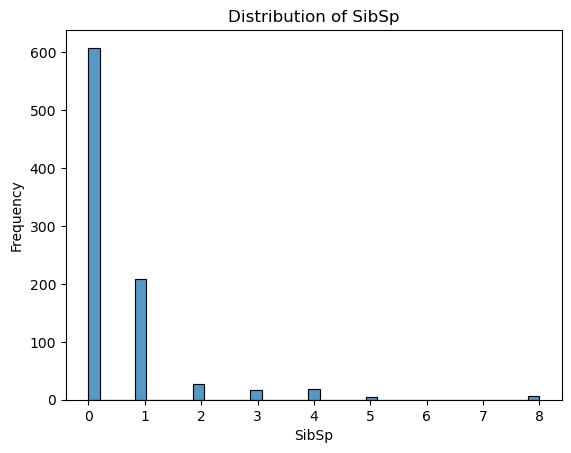

C:\Users\Ju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


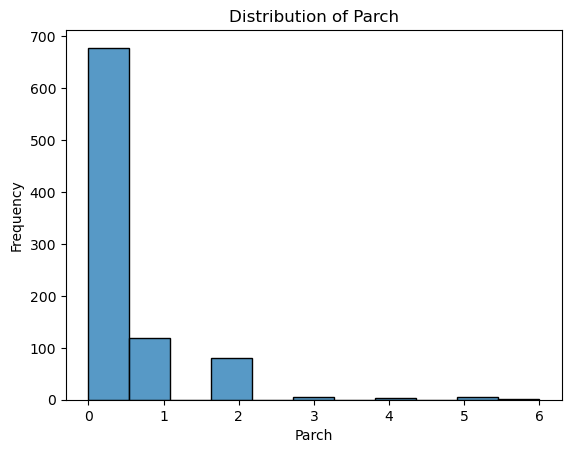

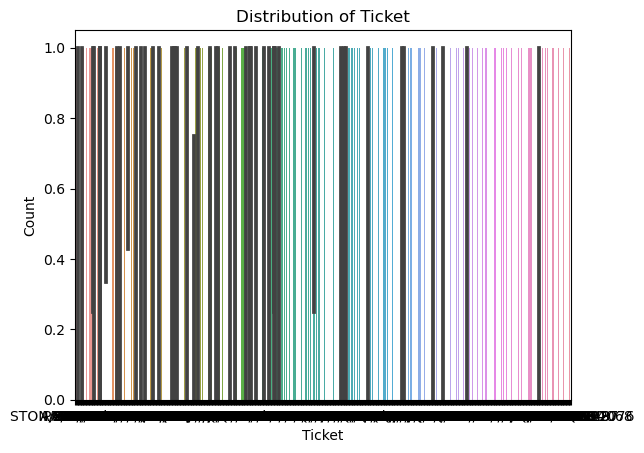

C:\Users\Ju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


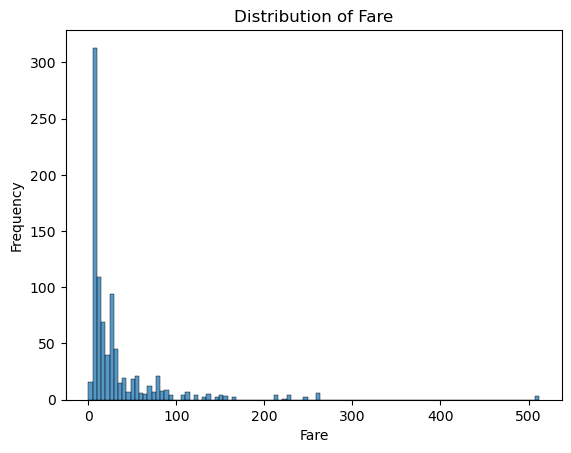

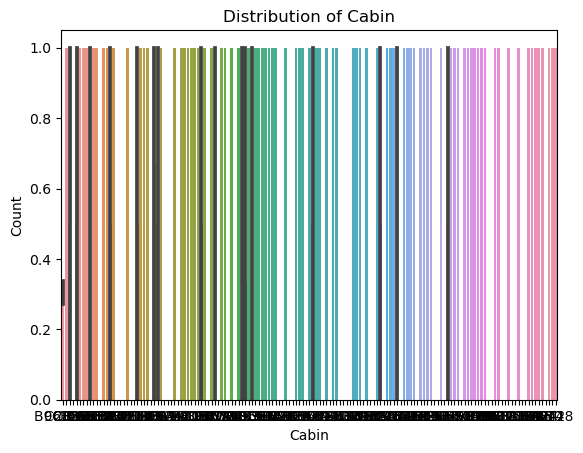

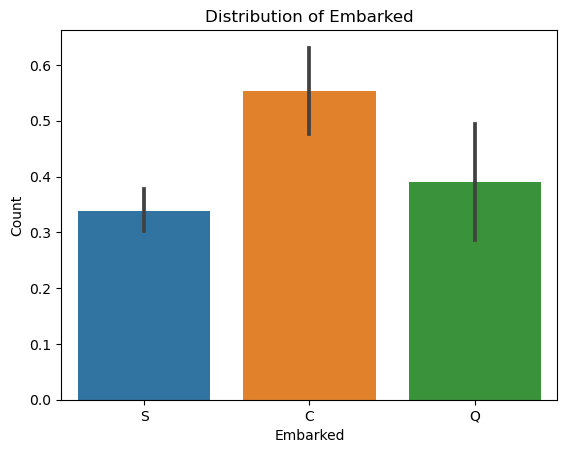

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset

def visualize_variable(variable):
  """
  This function visualizes a given variable from the DataFrame.

  Args:
      variable: Name of the variable to visualize.
  """
  # Check data type
  if data[variable].dtype == "object":
    # Categorical variable: Use bar chart
    sns.barplot(x=variable, y="Survived", data=data)
  else:
    # Numerical variable: Use histogram
    sns.histplot(data=data, x=variable)

  # Customize the plot
  plt.title(f"Distribution of {variable}")
  plt.xlabel(variable)
  plt.ylabel("Count" if data[variable].dtype == "object" else "Frequency")
  plt.show()



# Loop through all columns and visualize
for col in data.columns:
  visualize_variable(col)

In [6]:
# Get descriptive statistics of the 'Fare' variable
fare_stats = data['Fare'].describe()

# Print the descriptive statistics
print(fare_stats)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


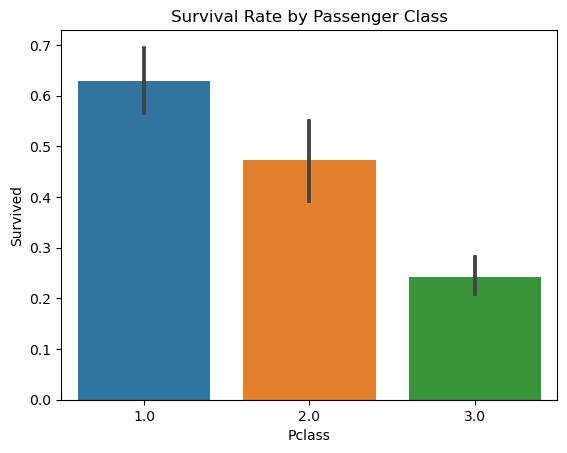

In [7]:
# Function to create bar chart
# Create the barplot using Seaborn
sns.barplot(x='Pclass', y='Survived', data=data)

Parch
0.0    0.343658
1.0    0.550847
2.0    0.500000
3.0    0.600000
4.0    0.000000
5.0    0.200000
6.0    0.000000
Name: Survived, dtype: float64

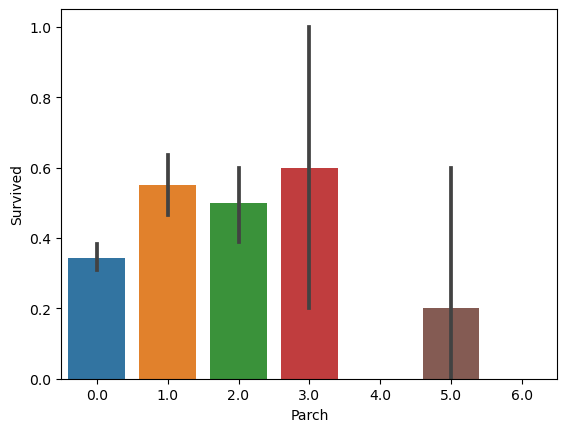

In [29]:

# Create the barplot using Seaborn
sns.barplot(x='Parch', y='Survived', data=data)
#Survival rate by sex
data.groupby('Parch')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

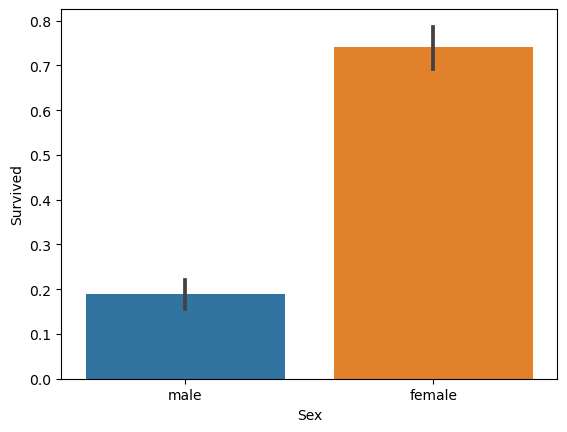

In [35]:
#NB: Y'a un blème avec sex
# Create the barplot using Seaborn
sns.barplot(x='Sex', y='Survived', data=data)

#Survival rate by sex
data.groupby('Sex')['Survived'].mean()

SibSp
0.0    0.345395
1.0    0.535885
2.0    0.464286
3.0    0.250000
4.0    0.166667
5.0    0.000000
8.0    0.000000
Name: Survived, dtype: float64

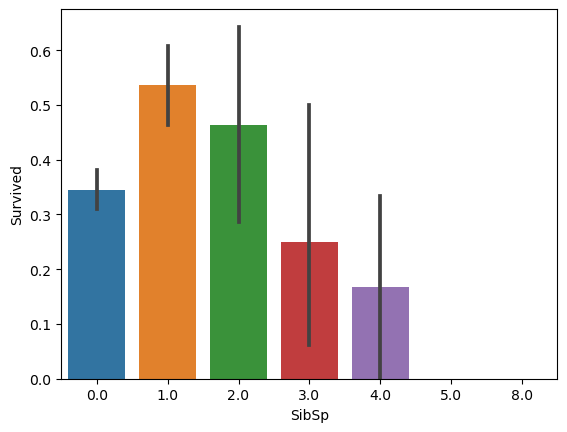

In [30]:

# Create the barplot using Seaborn
sns.barplot(x='SibSp', y='Survived', data=data)

#Survival rate by sex
data.groupby('SibSp')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

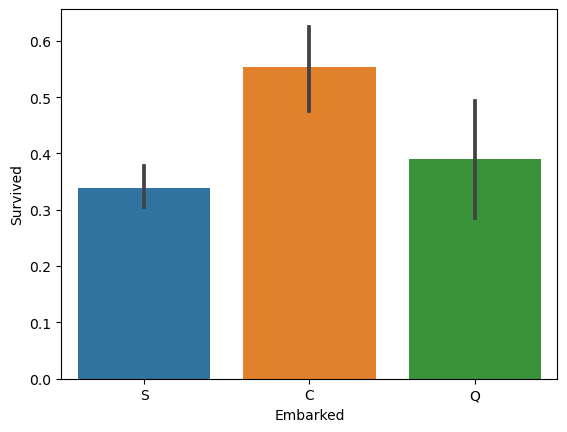

In [31]:

# Create the barplot using Seaborn
sns.barplot(x='Embarked', y='Survived', data=data)
#Survival rate by sex
data.groupby('Embarked')['Survived'].mean()

In [ ]:
#NB: Pour les variables Fare, Age, il faudra regrouper en classes+ petites


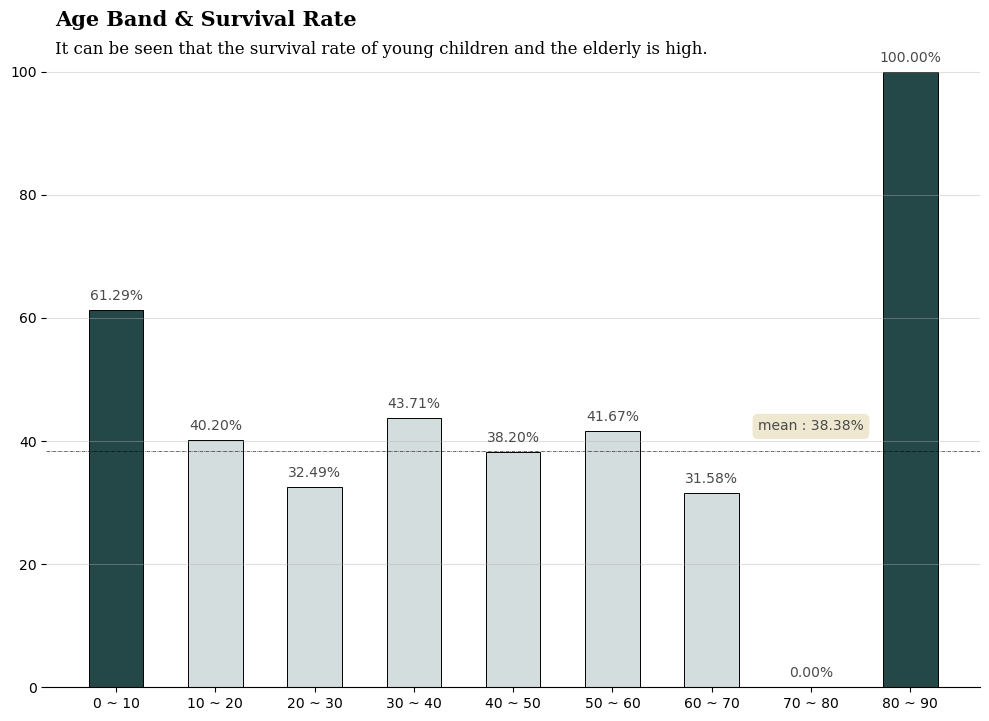

In [18]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

data['age_band'] = data['Age'].apply(age_band)
titanic_age = data[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747' # color highlight

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)



for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)


# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')


# mean line + annotation
mean = data['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))
    

# Title & Subtitle    
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

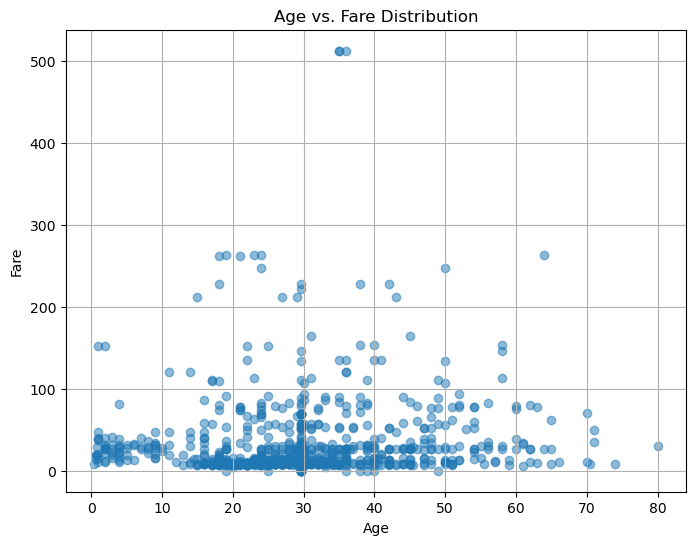

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


# Scatter plot: Age vs. Fare
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare Distribution')
plt.grid(True)
plt.show()


In [29]:
#Overall survival rate
data['Survived'].mean()


0.3838383838383838

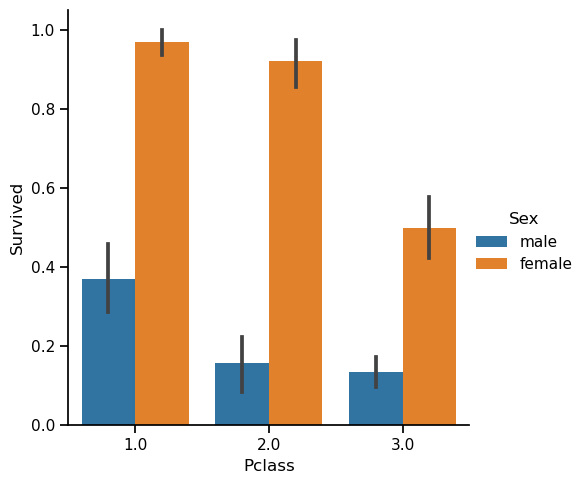

In [34]:
#Survival rate by sex and passenger class
with sns.plotting_context('notebook',font_scale=1):

    ax = sns.catplot(
        x='Pclass',
        y='Survived',
        hue='Sex',
        kind='bar',
        data=data,
    )

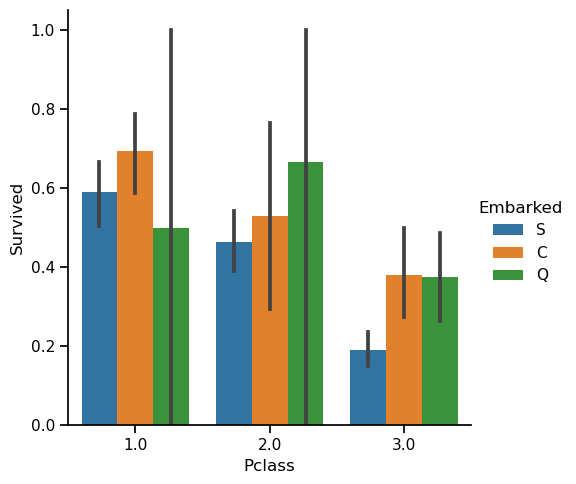

In [38]:
#Survival rate by sex and passenger class
with sns.plotting_context('notebook',font_scale=1):

    ax = sns.catplot(
        x='Pclass',
        y='Survived',
        hue='Embarked',
        kind='bar',
        data=data,
    )

C:\Users\Ju\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ju\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ju\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ju\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

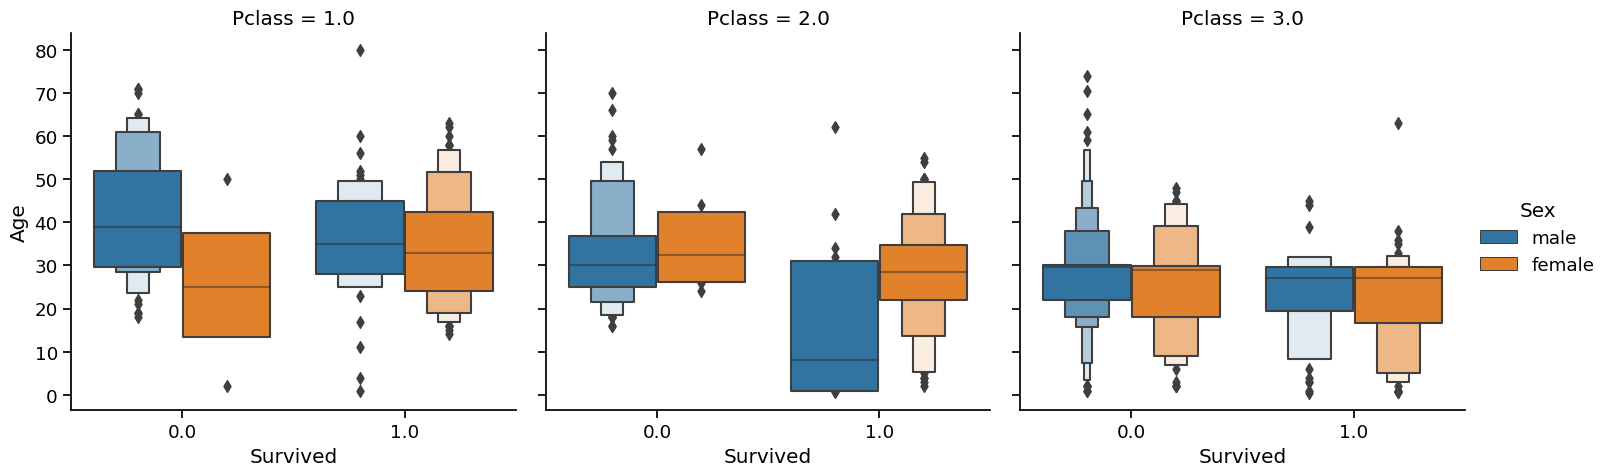

In [41]:
with sns.plotting_context('notebook',font_scale=1.2):

    ax = sns.catplot(
        x='Survived',
        y='Age',
        hue='Sex',
        col='Pclass',
        data=data,
        orient='v',
        kind='boxen',
    )

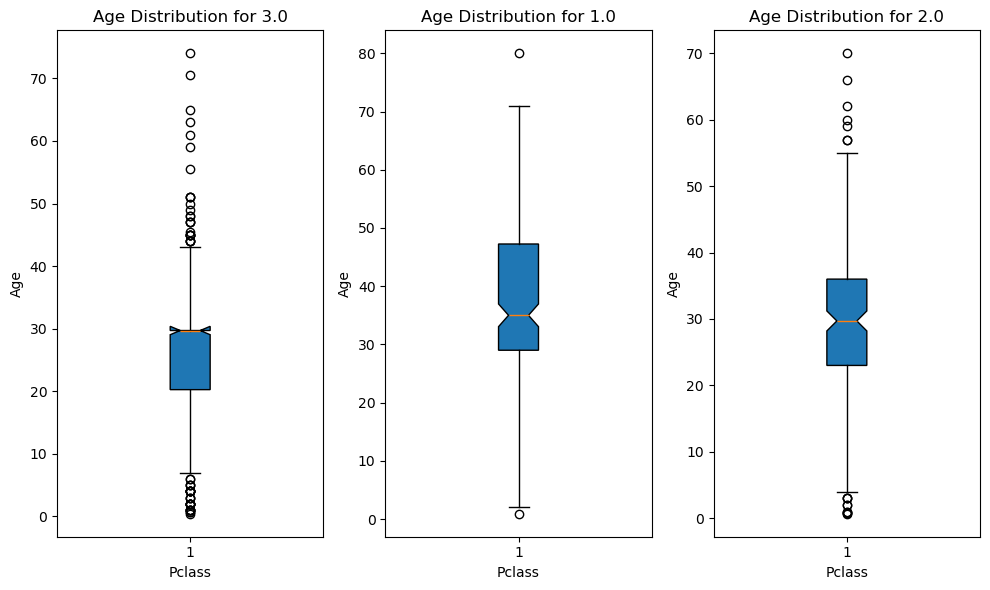

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
# Select features
categories = data[category].unique()  # Get unique categories

# Create the figure
plt.figure(figsize=(10, 6))

# Loop through categories and create box plots
for i, cat in enumerate(categories):
    plt.subplot(1, len(categories), i+1)
    filtered_data = data[data[category] == cat]  # Filter data by category
    plt.boxplot(filtered_data[feature], notch=True, vert=True, patch_artist=True)
    plt.xlabel(category)
    plt.ylabel(feature)
    plt.title(f'{feature} Distribution for {cat}')
    plt.xticks([1])  # Assuming single data point per category here (adjust if needed)

plt.tight_layout()
plt.show()

In [32]:
#Important: normalement cette étape devrait être dans la partie 1
data["Sex"] = data["Sex"].apply(lambda x: 0 if x == "male" else 1)


          Sex       Age      Fare     Parch     SibSp  Survived    Pclass
Sex       NaN       NaN       NaN       NaN       NaN       NaN       NaN
Age       NaN  1.000000  0.118847 -0.217290 -0.147035 -0.039109 -0.308875
Fare      NaN  0.118847  1.000000  0.410074  0.447113  0.323736 -0.688032
Parch     NaN -0.217290  0.410074  1.000000  0.450014  0.138266 -0.022801
SibSp     NaN -0.147035  0.447113  0.450014  1.000000  0.088879 -0.043019
Survived  NaN -0.039109  0.323736  0.138266  0.088879  1.000000 -0.339668
Pclass    NaN -0.308875 -0.688032 -0.022801 -0.043019 -0.339668  1.000000


C:\Users\Ju\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


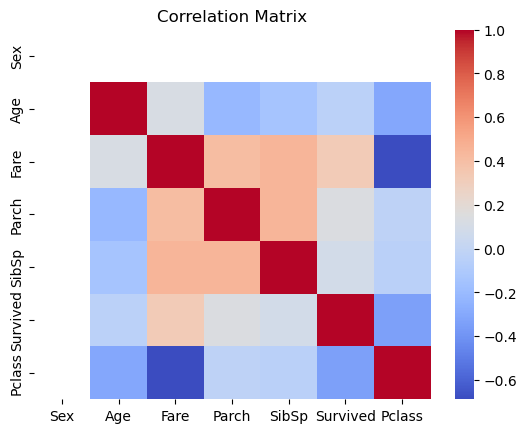

In [15]:
import matplotlib.pyplot as plt

#Regarder la correlation des variables entre elles

# Select numerical features (replace with your desired features)
numerical_features = ['Sex','Age', 'Fare', 'Parch', 'SibSp','Survived','Pclass']

# Create the correlation matrix
correlation = data[numerical_features].corr(method='spearman')  # Use Spearman for mixed data types

# Print the correlation matrix
print(correlation)

# Create the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
#Regarder la correlation des variables avec 'Survived'

corr_matrices = {}

# Calculate correlation matrix for each feature with survival
for feature in numerical_features:
    corr_matrix = data[[feature, 'Survived']].corr(method='spearman')  # Spearman for mixed data types
    corr_matrices[feature] = corr_matrix.iloc[1, 0]  # Extract correlation value with 'Survived'

# Print the correlation values
print("Correlations with Survival:")
for feature, correlation in corr_matrices.items():
    print(f"{feature}: {correlation:.2f}")

#NB:Y'a une erreur avec le Nan de sex

Correlations with Survival:
Sex: nan
Age: -0.04
Fare: 0.32
Parch: 0.14
SibSp: 0.09
Survived: 1.00
Pclass: -0.34


In [59]:
#Pour faire les t-test, donc regarder la significativité de la relation entre chaque variable numérique et 'Survived' 

import pandas as pd
from scipy import stats

# Assuming 'titanic_data' is your dataframe
numeric_cols = data.select_dtypes(include=[np.number])  # Get numeric columns

# Loop through each numeric column (excluding target variable)
for col in numeric_cols.columns:
    if col != 'Survived':  # Avoid testing the target variable
        survived_data = data[data['Survived'] == 1][col]
        not_survived_data = data[data['Survived'] == 0][col]

        # Perform t-test
        t_stat, p_value = stats.ttest_ind(survived_data, not_survived_data)

        # Print results
        print(f"T-statistic for '{col}': {t_stat}")
        print(f"p-value for '{col}': {p_value}")
        print("---------------------")


T-statistic for 'PassengerId': -0.14928098427484984
p-value for 'PassengerId': 0.8813657768798064
---------------------
T-statistic for 'Pclass': -10.725263268949469
p-value for 'Pclass': 2.5370473879814566e-25
---------------------
T-statistic for 'Sex': 19.297816550123354
p-value for 'Sex': 1.4060661308802594e-69
---------------------
T-statistic for 'Age': -2.0865081090373168
p-value for 'Age': 0.03721708372685034
---------------------
T-statistic for 'SibSp': -1.053836896352195
p-value for 'SibSp': 0.29224392869829374
---------------------
T-statistic for 'Parch': 2.4420204414794604
p-value for 'Parch': 0.014799245374728058
---------------------
T-statistic for 'Fare': 7.939191660871055
p-value for 'Fare': 6.120189341924198e-15
---------------------
T-statistic for 'Survived_Num': inf
p-value for 'Survived_Num': 0.0
---------------------


C:\Users\Ju\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [42]:
#+Penser à faire des stat desc. en plus

# Get descriptive statistics for numerical variables (excluding PassengerId)
numerical_cols = data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
  if col != 'PassengerId':
    print(f"\n**Descriptive statistics of {col}**")
    print(data[col].describe())  # Get mean, median, std, min, max, et


**Descriptive statistics of Survived**
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

**Descriptive statistics of Pclass**
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

**Descriptive statistics of Age**
count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

**Descriptive statistics of SibSp**
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

**Descriptive statistics of Parch**
count    891.000000
mean       0.381594
std        0.806057

In [43]:
# Get frequency tables for categorical variables
categorical_cols = data.select_dtypes(include=[object]).columns
for col in categorical_cols:
  print(f"\n**Frequency table of {col}**")
  print(data[col].value_counts())  # Count occurrences in each category


**Frequency table of Name**
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

**Frequency table of Sex**
Sex
male      577
female    314
Name: count, dtype: int64

**Frequency table of Ticket**
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

**Frequency table of Cabin**
Cabin
B96 B98        691
G6               4
C23 C25 C27      4
C22 C26    